<a href="https://colab.research.google.com/github/Amal-Baby-Mathews/Mega_ML/blob/main/LOF_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/MyDrive/Data_ML/temperory_dataset.csv'

# Create a local Colab directory to save the file
local_path = '/content/Local_Data'
os.makedirs(local_path, exist_ok=True)  # Create directory if it doesn't exist

# Copy the file from the shared Drive directory to the local Colab environment
!cp "{file_path}" "{local_path}"

print(f"File copied to local Colab")

File copied to local Colab


In [3]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def read_csv_dataset(location, fieldnames, nrows=None):
    df = pd.read_csv(location, usecols=fieldnames, nrows=nrows)
    # Remove rows with 0, NA, or null values
    df = df.dropna(subset=fieldnames)
    #df = df[(df[fieldnames] != 0).all(axis=1)]
    return df

# Usage
fieldnames = ["be_stream2methane", "al_productgasoutlet_temp", "fl_inlet_flow", "be_ambient_tt_scaled_value", "be_carbonvesselinletflow_ft418", "be_scg_n2"]
dataset = read_csv_dataset(r"/content/Local_Data/temperory_dataset.csv", fieldnames)
print(len(dataset))


464210


In [5]:
# Split the dataset into training and testing sets
X_train = dataset.iloc[:400000, :].values # First 450,000 rows for training
  # Remaining 50,000 rows for testing

# Train the LOF model
#clf = LocalOutlierFactor(n_neighbors=50, contamination=0.5)


In [6]:
print(len(dataset["be_stream2methane"]))

464210


In [7]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming time/steps are in the first column (index 0)
def local_mean(data, k,i):
  """
  Calculates the local mean for each data point using k nearest neighbors.
  """
  neighbors = KNeighborsRegressor(n_neighbors=k)
  neighbors.fit(data, data[:, i])
  local_means = neighbors.predict(data)
  # Reshape to match the number of fields (assuming one value per data point)
  local_means = local_means.reshape(-1, 1)  # Reshape to (n_samples, 1)
  return local_means


In [59]:
# import scipy.interpolate as interp
clf = LocalOutlierFactor(n_neighbors=300, contamination=0.0005)
# Predict anomalies on the test set
y_pred = clf.fit_predict(X_train)

# Get the negative outlier factor for each sample
negative_outlier_factors = -clf.negative_outlier_factor_

outliers = np.where(y_pred == -1)[0]


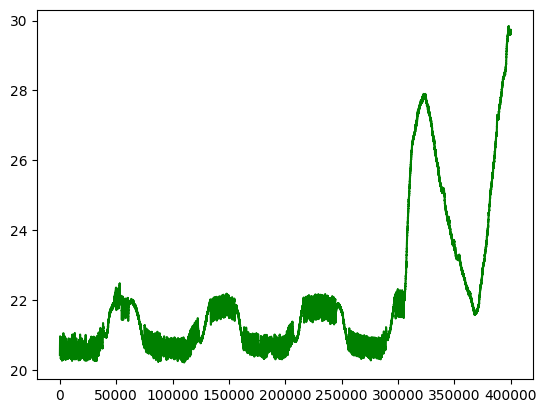

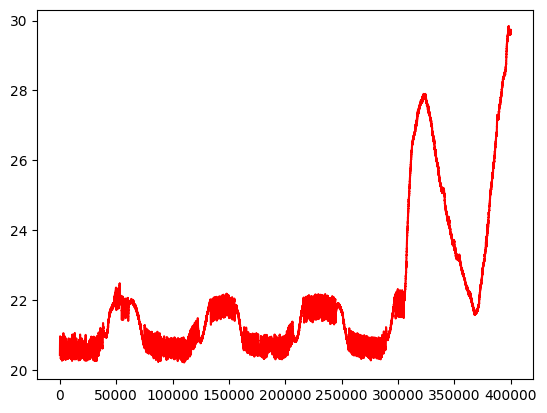

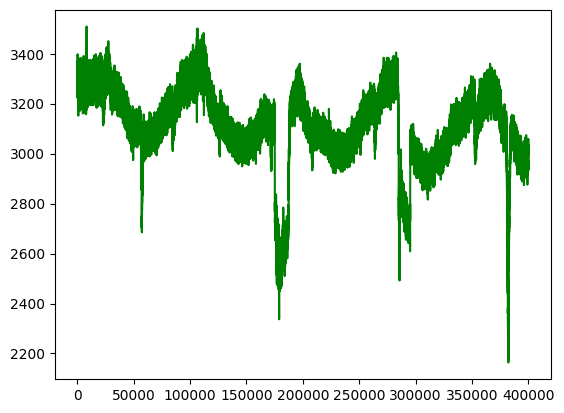

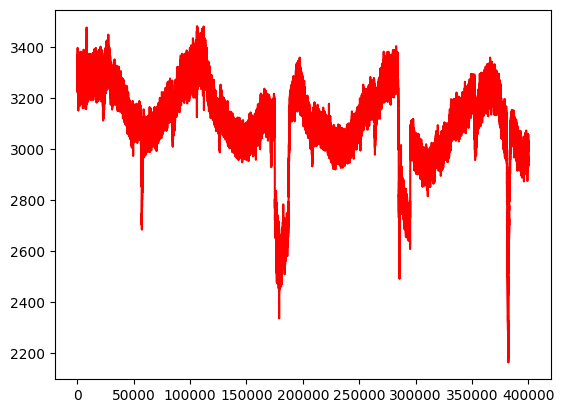

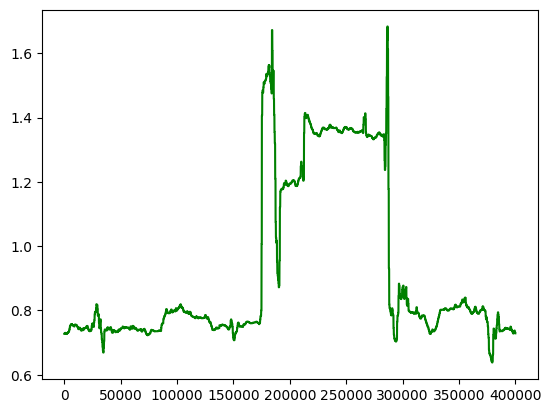

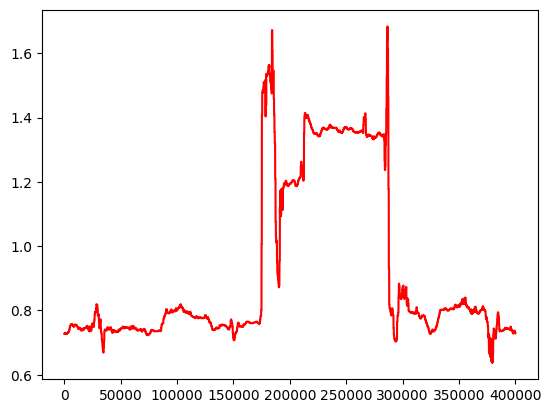

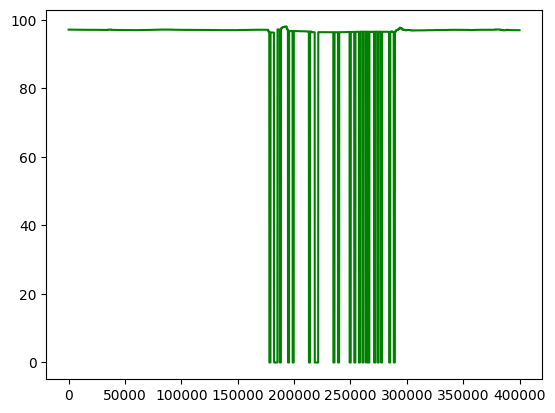

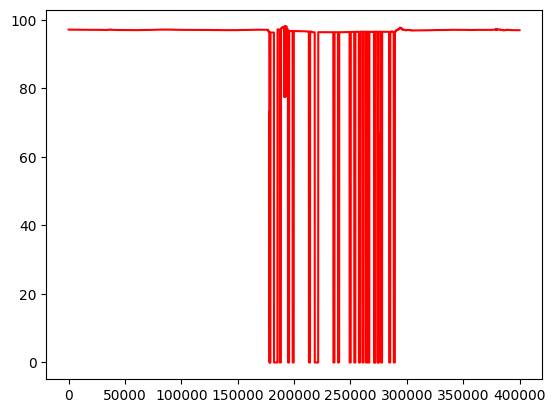

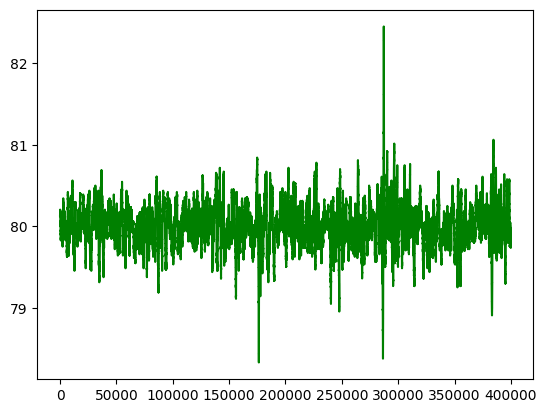

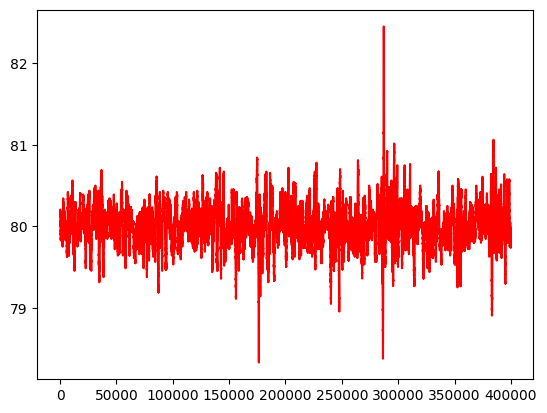

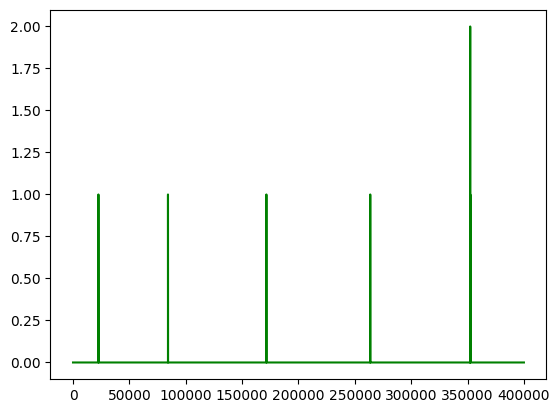

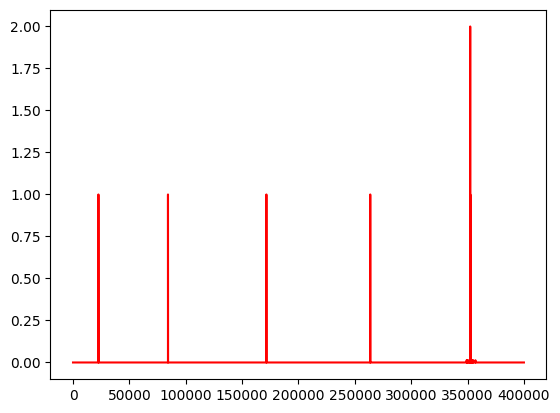

In [69]:
from statistics import mean
num_fields = X_train.shape[1]
X_temp=np.copy(X_train)
#print(X_train.shape)
for i in range(num_fields):
  for outlier in outliers:
    X_temp[outlier,i]=mean(X_train[outlier-5000:outlier+5000,i])
    #X_temp[outlier,i]=null
  plt.plot(X_train[:,i],c="green")
  plt.show()
  plt.plot(X_temp[:,i],c="red")
  plt.show()

In [70]:
# Initialize an empty list to store the indices of the final outliers
final_outliers = []

# Iterate over the indices of the outliers
for idx in outliers:
    # Check if the current outlier index is not close to any of the final outliers
    if all(np.linalg.norm(X_train[idx] - X_train[fo]) > 100 for fo in final_outliers):
        # Add the current outlier index to the final outliers list
        final_outliers.append(idx)

# Convert the list of final outliers back to a NumPy array
outliers = np.array(final_outliers)

<ipython-input-72-373c65dcec6a>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x, y + 0.5, f"LM: {float(local_mean_val):.2f}", ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='green', edgecolor='black', boxstyle='round,pad=0.3'))


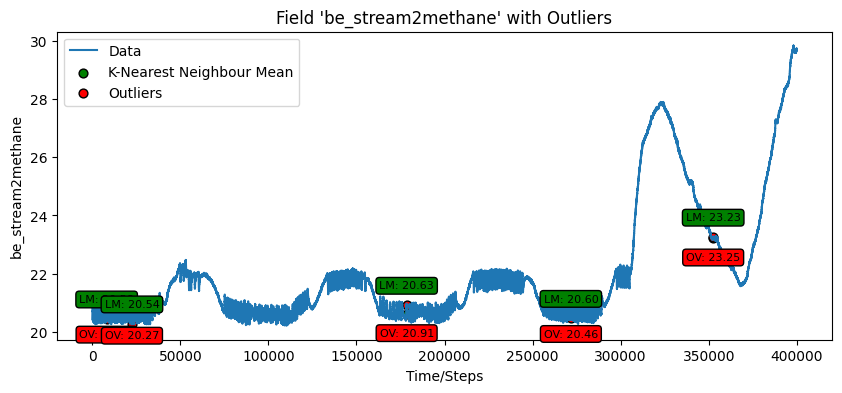

<ipython-input-72-373c65dcec6a>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x, y + 0.5, f"LM: {float(local_mean_val):.2f}", ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='green', edgecolor='black', boxstyle='round,pad=0.3'))


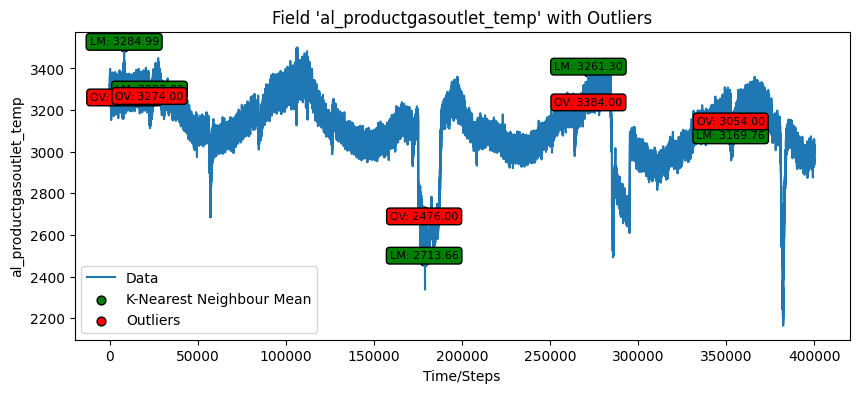

<ipython-input-72-373c65dcec6a>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x, y + 0.5, f"LM: {float(local_mean_val):.2f}", ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='green', edgecolor='black', boxstyle='round,pad=0.3'))


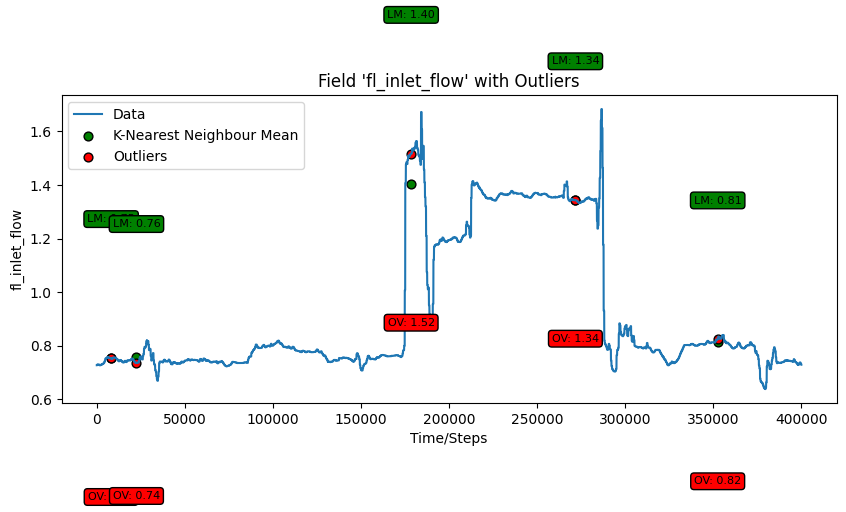

<ipython-input-72-373c65dcec6a>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x, y + 0.5, f"LM: {float(local_mean_val):.2f}", ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='green', edgecolor='black', boxstyle='round,pad=0.3'))


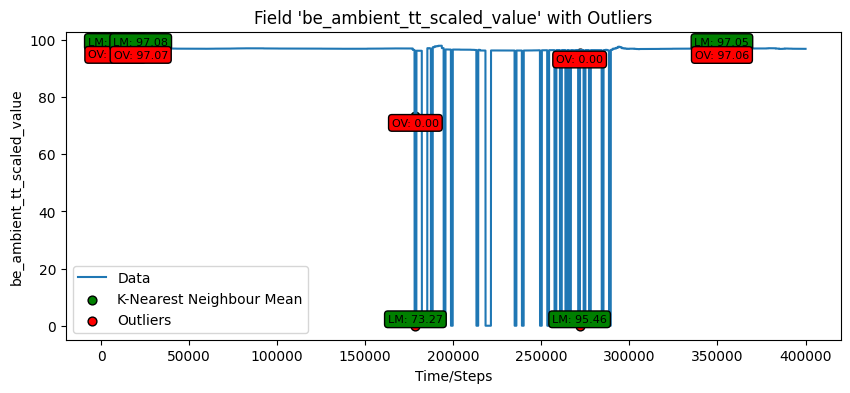

<ipython-input-72-373c65dcec6a>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x, y + 0.5, f"LM: {float(local_mean_val):.2f}", ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='green', edgecolor='black', boxstyle='round,pad=0.3'))


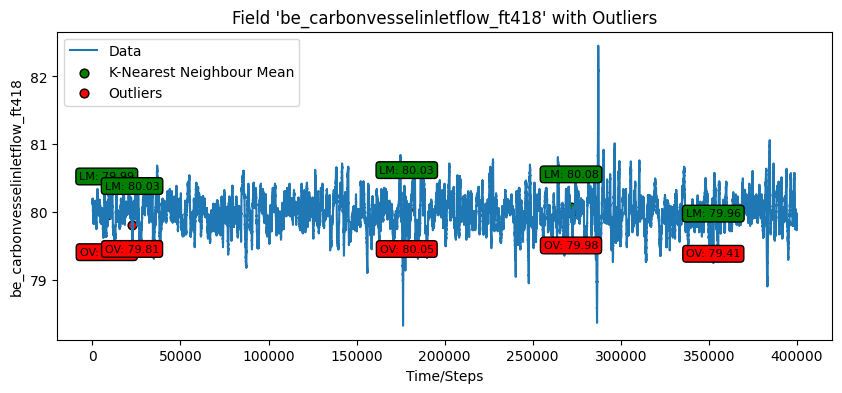

<ipython-input-72-373c65dcec6a>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x, y + 0.5, f"LM: {float(local_mean_val):.2f}", ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='green', edgecolor='black', boxstyle='round,pad=0.3'))


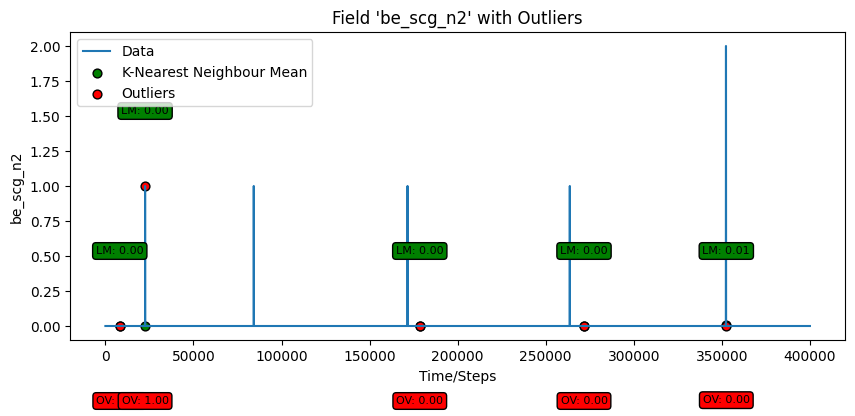

In [72]:
#from matplotlib.patches import Text

for i in range(num_fields):
  plt.figure(figsize=(10, 4))
  plt.plot(X_train[:, i], label='Data')
  local_means = local_mean(X_temp, k=20, i=i)

  # Scatter plot for outliers with local mean values
  plt.scatter(outliers, local_means[outliers], c='green', edgecolor='k', s=40, label='K-Nearest Neighbour Mean')

  # Scatter plot for outliers with data values (red)
  outlier_data = X_train[outliers, i]
  plt.scatter(outliers, outlier_data, c='red', edgecolor='k', s=40, label='Outliers')

  # Display local mean values for each outlier (optional)
  for outlier_idx, (x, y, local_mean_val) in enumerate(zip(outliers, outlier_data, local_means[outliers])):
    plt.text(x, y + 0.5, f"LM: {float(local_mean_val):.2f}", ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='green', edgecolor='black', boxstyle='round,pad=0.3'))
    plt.text(x, local_mean_val - 0.5, f"OV: {float(y):.2f}", ha='center', va='top', fontsize=8, bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3'))

  plt.xlabel('Time/Steps')
  plt.ylabel(fieldnames[i])
  plt.legend()
  plt.title(f"Field '{fieldnames[i]}' with Outliers")
  plt.show()